In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tol_colors as tc # Note: this must first be installed using `pip install tol-colors`

# Generating some data

[]

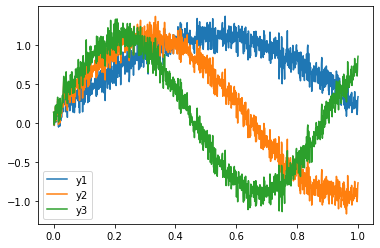

In [2]:
x = np.linspace(0,1, 1000)
noise = np.random.normal(0.1,0.1, len(x))
y1 = np.sin(3*x)+noise
y2 = np.sin(5*x)+noise
y3 = np.sin(7*x)+noise

plt.plot(x,y1, label='y1')
plt.plot(x,y2, label='y2')
plt.plot(x,y3, label='y3')
plt.legend()
plt.plot()

# Colour-blind friendly line plots
This methodology for plotting below applies for any color scheme but these examples are based on the colour-blind friendly schemes created by Paul Tol. More colour sets can be found [here](https://packages.tesselle.org/khroma/articles/tol.html).



## Categorical colours

In [3]:
# Load a categorical colour set: Bright, vibrant, muted and light have the most colours (between 7 and 9)
# Print help(cset) to get more information about the object
cset = tc.tol_cset('bright')

# Hex-codes accessible through indexing and as class variables
print(cset)
print(cset[0])
print(cset.blue)

bri_cset(blue='#4477AA', red='#EE6677', green='#228833', yellow='#CCBB44', cyan='#66CCEE', purple='#AA3377', grey='#BBBBBB', black='#000000')
#4477AA
#4477AA


### Manual selection

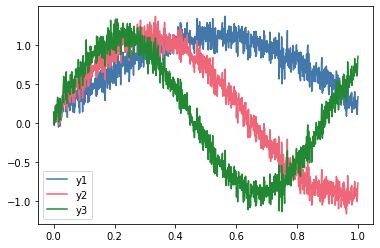

In [4]:
plt.plot(x,y1, label='y1', color=cset[0])
plt.plot(x,y2, label='y2', color=cset[1])
plt.plot(x,y3, label='y3', color=cset[2])
plt.legend()
plt.show()

This can also be used in iterative plots:

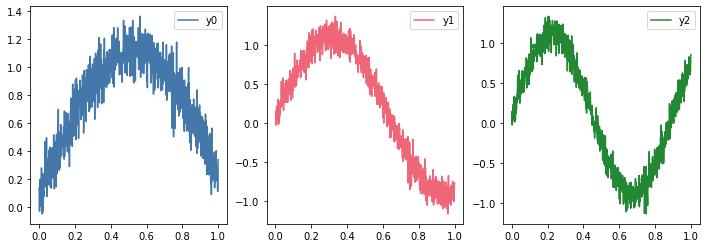

In [5]:
fig, axs = plt.subplots(1,3, figsize=(3*4, 4))
axs = axs.ravel()
data = [y1,y2,y3]

for i, (ax, y) in enumerate(zip(axs, data)):
    ax.plot(x,y, label=f'y{i}', color=cset[i]) # The color is selected based on index
    ax.legend()
plt.show()

Changing the order:

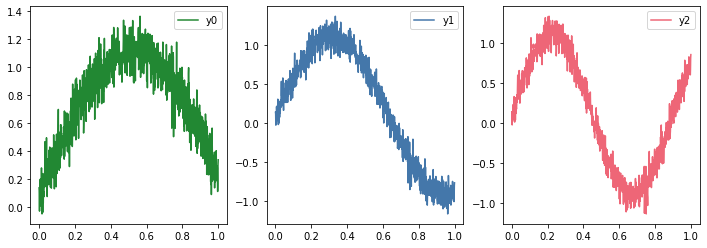

In [6]:
fig, axs = plt.subplots(1,3, figsize=(3*4, 4))
axs = axs.ravel()

# Select colors from cset using names and make a new list
# with the preferred colour order
csubset = [
    cset.green,
    cset.blue,
    cset.red
]

for i, (ax, y) in enumerate(zip(axs, data)):
    ax.plot(x,y, label=f'y{i}', color=csubset[i]) # Select colour from new list using indices
    ax.legend()
plt.show()

### Changing the colour cycler

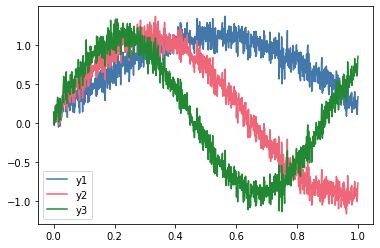

In [7]:
# This changes matplotlibs default colour set
plt.rc('axes', prop_cycle=plt.cycler('color', list(cset)))

plt.plot(x,y1, label='y1')
plt.plot(x,y2, label='y2')
plt.plot(x,y3, label='y3')
plt.legend()
plt.show()

## Sequential colours
This one is slightly more involved

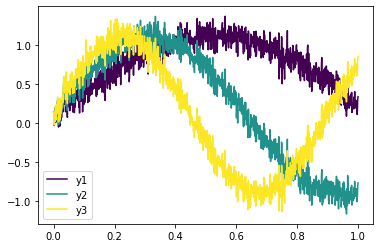

In [8]:
fix, ax = plt.subplots()

# Load the colour map and split it into as many parts as there are lines
n = 3 # The number of lines used in the plot. Using the scheme above, could be automated with len(data).
colours = plt.cm.viridis(np.linspace(0,1,n)) # The colourmap takes an interval of floats between 0 and 1 as an argument.

# Proceed with in the same manner as previous
ax.plot(x,y1, label='y1', color=colours[0])
ax.plot(x,y2, label='y2', color=colours[1])
ax.plot(x,y3, label='y3', color=colours[2])
plt.legend()
plt.show()

Tweaking the colour-interval:

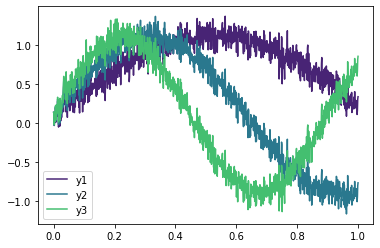

In [9]:
fix, ax = plt.subplots()

# Load the colour map and split it into as many parts as there are lines
n = 3
colours = plt.cm.viridis(np.linspace(0.1,0.7,n)) # Colourmap normalised to 0,1, change these limits to select other colour ranges.

# Proceed with in the same manner as previous
ax.plot(x,y1, label='y1', color=colours[0])
ax.plot(x,y2, label='y2', color=colours[1])
ax.plot(x,y3, label='y3', color=colours[2])
plt.legend()
plt.show()

# Colour-blind friendly density plots

## Scatter
Pyplot natively uses the viridis colourmap so simply feeding densities to the `c` argument in a scatter plot will produce the following:

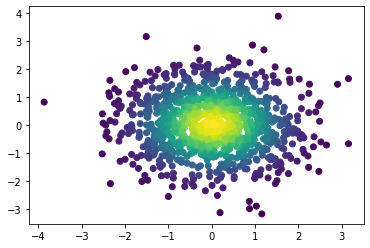

In [10]:
# Generate some artificial data
N = 1000
Y = np.random.normal(0,1, (N,2))
y1, y2 = Y[:,0], Y[:,1]

def Kgauss(x):
    return np.exp(-np.dot(x,x)/2)/(2*np.pi)
	
def gaussian_kde(X, width):
    shift = np.average(X)
    f = np.array([Kgauss((shift-x)/width) for x in X])
    return f/(len(f)*width**2)

# Obtain scatter densities
dens = gaussian_kde(Y, 1)

plt.scatter(y1,y2, c=dens) # Specifying densities will default to viridis-density.
plt.show()

Assigning a colourmap to the argument `cmap` allows one to control the colour scheme:

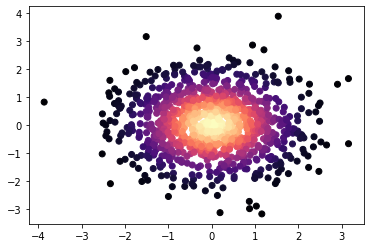

In [11]:
dens = gaussian_kde(Y, 1)
plt.scatter(y1,y2, c=dens, cmap='magma') # Select other standard colourmap.
plt.show()

We may add a new, custom, colourmap like the inte first examples. In order to also equip the plot with a colourbar using `plt.colorbar()` one must assign a 'scalarmappable', which is an object that maps data (points) to a colour and  that has a `get_cmap()` method. See below.

256


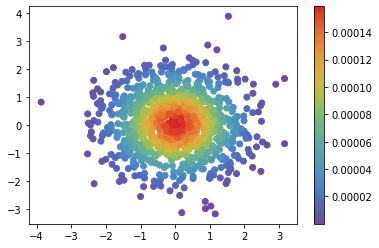

In [14]:
# Load a sequential colour set
cmap = tc.tol_cmap('rainbow')
print(cmap)
print(cmap.N)

dens = gaussian_kde(Y, 1)

fig, ax = plt.subplots()
s = ax.scatter(y1,y2, c=dens, cmap=cmap) # Select non-default colourmap.
print(s.get_cmap())

# Colourbar
cbar = plt.colorbar(
    s,     # Object that maps data to colours, i.e. have the get_cmap() method
    ax=ax, # An axis object is required for positioning
)
plt.show()

## 2D Plots
The same goes for 2D histograms, the difference being in how the 'scalarmappable' is obtained:

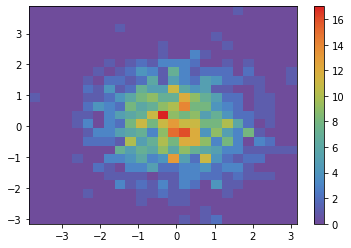

In [15]:
cmap = tc.tol_cmap('rainbow_PuRd')

fig, ax = plt.subplots()

h = ax.hist2d(y1,y2, cmap=cmap, bins=25)
print(h[3].get_cmap())

cbar = plt.colorbar(h[3],ax=ax) # Note that where the colour information is stored depends on the object
plt.show()

or hexbins:

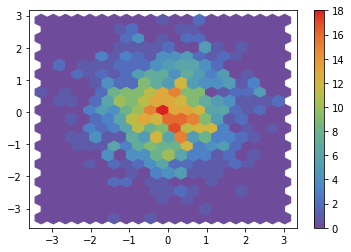

In [30]:
import math

nx = 20
ny = math.floor(nx/3**0.5) # Makes the hexagons more 'circular'

fig, ax = plt.subplots()
h = ax.hexbin(y1,y2, cmap=cmap, gridsize=(nx, ny))
print(h.get_cmap())
cbar = plt.colorbar(h,ax=ax) # And differently here as well
plt.show()

as well as grids:

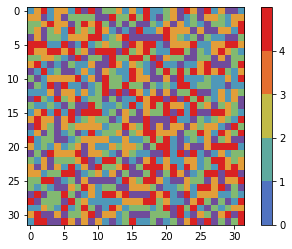

In [31]:
# Generate data
Y = np.random.randint(0, 5, size=(32,32))

# Plot
fig, ax = plt.subplots()
im = ax.imshow(Y, cmap=cmap)
cbar = plt.colorbar(
    im,
    ax=ax,
    ticks=np.arange(5),     # Assigns integer tick labels
    boundaries=np.arange(6) # Discretises the colours
)